---
Para la práctica y el cuestionario la mayoría de los calculos pueden realizarse de forma manual. No obstante también puede utilizarse una biblioteca como sympy para realizar cálculos que tienen que ver con funciones, derivadas  e integrales entre otras muchas operaciones.

***Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, items y/o valores pueden no coincidir con los de la práctica.***


In [ ]:
# si no esta instalado sympy:
# Para instalar con conda:
# conda install -c anaconda sympy
# Para instalar con pip:
# pip install sympy # usar ! al inicio para colab

In [ ]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import lambdify

# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

x/(2*x**2 + 3*y**2 + 1)

### Obtiene función de derivada parcial

In [ ]:
df_dx = diff(f, x)
df_dx

-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

### Obtiene función de derivada parcial

In [ ]:
df_dy = diff(f, y)
df_dy

-6*x*y/(2*x**2 + 3*y**2 + 1)**2

#Gráfico de la función

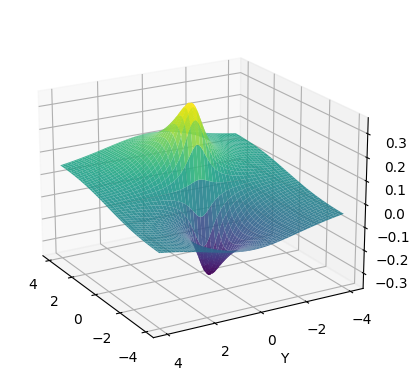

In [ ]:
# Malla de puntos para graficar
X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = lambdify((x, y), f, 'numpy')(X, Y)

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=150)  # Puedes ajustar los valores de elev y azim para cambiar la vista
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Verificación del Gradiente

In [ ]:
# coordenadas del punto a calcular
(px, py) = (1, -1)

# evalua la funcion f en x e y
pz = f.evalf(subs = {x:px, y:py}) #evalua puntos particulares sobre la funcion
print("\nDada la función f(x,y) = ", f)
print("  en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )



Dada la función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
  en (1.000000,-1.000000) vale 0.166667

 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (1.000000,-1.000000) vale 0.055556

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (1.000000,-1.000000) vale 0.166667



# Dirección de Crecimiento y Decrecimiento

In [ ]:
# la función crece en dirección al gradiente
rx = px+0.1*df_dx.evalf(subs = {x:px,y:py}) #0.1 es la tasa de crecimiento
ry = py+0.1*df_dy.evalf(subs = {x:px,y:py})
rz = f.evalf(subs = {x:rx, y:ry})

# la función decrece en dirección al gradiente
sx = px-0.1*df_dx.evalf(subs = {x:px,y:py})
sy = py-0.1*df_dy.evalf(subs = {x:px,y:py})
sz = f.evalf(subs = {x:sx, y:sy})

print("\nLa función f(x,y) = ", f)
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" en (%f,%f) vale %f (crece)" % (rx, ry, rz) )
print(" en (%f,%f) vale %f (decrece)" % (sx, sy, sz) )


La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 en (1.000000,-1.000000) vale 0.166667
 en (1.005556,-0.983333) vale 0.169768 (crece)
 en (0.994444,-1.016667) vale 0.163596 (decrece)
